<a href="https://colab.research.google.com/github/yuliiabosher/Fiber-optic-project/blob/europe_stats_analysis/Europe_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#############
###########PREDICT PROGRESS################
#####There are two functions:
#fn_predict_five_year
#fn_predict_three_year


#The first function takes in five year values and calculates a line of best fit
#assuming they represent % availaibility values over a 5 year period. You also need to specify the start year and
#whether you want it to calculate the year availability will reach 100% OR the value for a given future year

#The second function is as above, but only takes three yearly values

#For both functions:
#where input parameter yearOrValueFlag = 0 it will return the year at which availability = 100%
#where  input parameter yearOrValueFlag > 0, it will return the predicted availability percentage at time startyear + yearOrValueFlag
#so if startyear = 2018 and you want to know what the value will be in 2025, set yearOrValueFlag to 7,

def fn_predict_five_year(year1Value, year2Value, year3Value, year4Value, year5Value, startyear, yearOrValueFlag):
  import math
  # define two arrays to hold the years and the corresponding values
  year = np.array([1,2,3,4,5])
  value = np.array([year1Value,year2Value,year3Value,year4Value,year5Value])

  # find line equation, beta1 (coefficient) and beta0 (y-intercept)
  beta1, beta0 = np.polyfit(year, value, 1)

  if yearOrValueFlag == 0:
    #find year for a 100% coverage
    y_value = 100
    x_year = 0


    x_year = (y_value - beta0)/beta1

    #the year value should be rounded up
    if thisyear > 0:
      thisyear = math.ceil(x_year) + startyear
    return thisyear
  else:
    #find coverage where year = yearOrValueFlag
    y_value = 0
    x_year = yearOrValueFlag

    y_value = beta0 + beta1*x_year

    return y_value

def fn_predict_three_year(year1Value, year2Value, year3Value, startyear, yearOrValueFlag):
  import math
  # define two arrays to hold the years and the corresponding values
  year = np.array([1,2,3])
  value = np.array([year1Value,year2Value,year3Value])

  # find line equation, beta1 (coefficient) and beta0 (y-intercept)
  beta1, beta0 = np.polyfit(year, value, 1)

  if yearOrValueFlag == 0:
    #find year for a 100% coverage
    y_value = 100
    x_year = 0


    x_year = (y_value - beta0)/beta1

    #the year value should be rounded up
    if thisyear > 0:
      thisyear = math.ceil(x_year) + startyear
    return thisyear
  else:
    #find coverage where year = yearOrValueFlag
    y_value = 0
    x_year = yearOrValueFlag

    y_value = beta0 + beta1*x_year

    return y_value



In [ ]:
# Import and alias the necessary libraries
import pandas as pd
import os.path
import errno

#mount google drive
from google.colab import drive
drive.mount('/content/drive')

#############
# EC broadband data file available from https://digital-strategy.ec.europa.eu/en/library/digital-decade-2024-broadband-coverage-europe-2023
# save the last sheet in the spreadsheet as .csv and name EUROPE_FIBRE.csv
# This path should be set to the location of the file
#############
fileEuropeData = '/content/drive/MyDrive/Colab/EUROPE_FIBRE.csv'
fileEuropeHouseholds = '/content/drive/MyDrive/Colab/EUROPE_FIBRE_HH.csv'

#fileEuropeData = 'd:/Users/Sharon/Documents/College/data/EUROPE_FIBRE.csv'
#fileEuropeHouseholds = 'd:/Users/Sharon/Documents/College/data/EUROPE_FIBRE_HH.csv'
#############
# Check we can find the file required, and read it into a pandas dataframe
# show the shape of the dataframe
#############
if os.path.exists(fileEuropeData) :
    print("Reading Europe fibre data.....")
    dfEurope = pd.read_csv(fileEuropeData)
else:
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), fileEuropeData)
print("Europe fibre file data shape:", dfEurope.shape)

if os.path.exists(fileEuropeHouseholds) :
    print("Reading Europe fibre data (households).....")
    dfEuropeHH = pd.read_csv(fileEuropeHouseholds)
else:
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), fileEuropeHouseholds)
print("Europe fibre file data (households) shape:", dfEuropeHH.shape)

###DEFINE FUNCTIONS FOR CLEANING THE FILE
#fn_clean_years removed % sign and changes datatype to float
#fn_change_col_name will change any column name in any dataframe


def fn_clean_years(thisdf, thiscol):
  #check column is still a string
  if thisdf[thiscol].dtype == 'object':
    #check for dashes -
    thisdf[thiscol] = thisdf[thiscol].str.replace('-', '')
    #convert the yearly value to a float - first remove the % sign
    thisdf[thiscol] = thisdf[thiscol].str.replace('%', '')#.astype(float)
    #check if there's a comma and remove those
    thisdf[thiscol] = thisdf[thiscol].str.replace(',', '')#.astype(float)
    #check for blanks
    thisdf[thiscol] = thisdf[thiscol].str.replace(' ', '')#.astype(float)
    #finally replace empty strings with None
    thisdf[thiscol] = thisdf[thiscol].replace('', None)
    #now change the datatype of the column
    #thisdf.astype({thiscol: 'float'}).dtypes
    thisdf[thiscol] = thisdf[thiscol].astype(float)
  return thisdf

def fn_change_col_name(thisdf, oldname, newname):
  #change the name of the geography column to URClass
  thisdf.rename(columns={oldname: newname}, inplace=True)
  return thisdf

#clean and prepare data
#we need to rename the Geography level URClass cos it didn't seemto like the space in the name
#then for each of the year columns strip the % sign from the value and change it from a string to a float
dfEuropeClean = fn_change_col_name(dfEurope, 'Geography level', 'URClass')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2023')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2022')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2021')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2020')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2019')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2018')
print(dfEuropeClean.head())

#now do the same for the households data
#in this case, we need to strip a , from the year columns and change it to a float
dfEuropeCleanHH = fn_change_col_name(dfEuropeHH, 'Geography level', 'URClass')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2023')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2022')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2021')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2020')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2019')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2018')
print(dfEuropeCleanHH.head())

europeCols = ['Country','Metric','URClass', 'Unit','2018','2019','2020','2021','2022','2023']
dfEuropeClean = dfEuropeClean[europeCols]
print(dfEuropeClean.head())

europeHHCols = ['Country','Metric','URClass','Unit','2018','2019','2020','2021','2022','2023']
dfEuropeCleanHH = dfEuropeCleanHH[europeCols]
print(dfEuropeCleanHH.head())

#rename year columns in each dataset
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2018', '2018%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2019', '2019%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2020', '2020%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2021', '2021%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2022', '2022%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2023', '2023%')

dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2018', '2018HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2019', '2019HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2020', '2020HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2021', '2021HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2022', '2022HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2023', '2023HH')

##merge the two datasets
colslist = ['Country', 'Metric','URClass']
dfFinal = pd.merge(dfEuropeClean,dfEuropeCleanHH,on=colslist, how='inner')

def fn_filter_by_metric(thisdf, thismetric):
  #return a new dataset which only contains specified metric
  return thisdf.query('Metric == "' + thismetric + '"')

#now run this function to get only those rows where Metric = FTTP
#this will give us all the rows for full fibre availability
dfEuropeCleanFTTP = fn_filter_by_metric(dfFinal, 'FTTP')
dfEuropeCleanFTTP.head()


#drop summary rows so only the countries are left
#dfEuropeCleanFTTPTotalDropEU = dfEuropeCleanFTTPTotal.drop(dfEuropeCleanFTTPTotal[dfEuropeCleanFTTPTotal['Country'] == 'EU27'].index)
#dfEuropeCleanFTTPTotalDropEU = dfEuropeCleanFTTPTotalDropEU.drop(dfEuropeCleanFTTPTotal[dfEuropeCleanFTTPTotal['Country'] == 'EU28'].index)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading Europe fibre data.....
Europe fibre file data shape: (1650, 16)
Reading Europe fibre data (households).....
Europe fibre file data (households) shape: (1650, 15)
   Country                        Metric URClass             Unit  \
0  Austria                     Land area   Total       km squared   
1  Austria                    Population   Total              ###   
2  Austria                    Households   Total              ###   
3  Austria   Broadband coverage (>2Mbps)   Total  % of Households   
4  Austria  Broadband coverage (>30Mbps)   Total  % of Households   

           2013          2014          2015          2016          2017  \
0    8387900.0%    8387900.0%    8387900.0%    8387900.0%    8387900.0%   
1  844301800.0%  845186000.0%  850688900.0%  857626100.0%  869007600.0%   
2  367087600.0%  373890627.2%  381326121.0%  385514998.2%  39

<ipython-input-25-940dabacb5a8>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdf.rename(columns={oldname: newname}, inplace=True)


,Country,Metric,URClass,Unit_x,2018%,2019%,2020%,2021%,2022%,2023%,Unit_y,2018HH,2019HH,2020HH,2021HH,2022HH,2023HH
15,Austria,FTTP,Total,% of Households,13.0,13.8,20.5,26.6,36.6,41.0,Households,512932.0,534791.0,805015.0,1054017.0,1463133.0,1652409.0
44,Belgium,FTTP,Total,% of Households,1.4,3.6,6.5,10.1,17.2,25.0,Households,68689.0,174923.0,309472.0,503257.0,861948.0,1204619.0
73,Bulgaria,FTTP,Total,% of Households,54.2,65.2,75.2,81.4,85.6,88.6,Households,1589576.0,1877295.0,2173209.0,2345497.0,2439632.0,2484082.0
102,Croatia,FTTP,Total,% of Households,23.4,31.0,35.6,38.7,53.9,62.1,Households,350771.0,450768.0,506428.0,547711.0,760941.0,891208.0
131,Cyprus,FTTP,Total,% of Households,0.5,10.1,26.2,41.4,60.0,77.1,Households,1526.0,31661.0,81913.0,130178.0,190216.0,246704.0


### Code snippets to predict progress and show data

### show european countries predicted to have less than 50% availability by 2030

<ipython-input-45-7469689abbc9>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['FTTP2024'] = vals2024
<ipython-input-45-7469689abbc9>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['FTTP2025'] = vals2025
<ipython-input-45-7469689abbc9>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

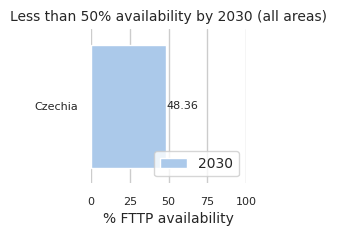

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def fn_filter_by_urclass(thisdf, thisUrclass):
  #return a new dataset which only contains specified URClass
  return thisdf.query('URClass == "' + thisUrclass + '"')


def fn_calc_and_plot(df_final, urclass):

  vals2024= []
  vals2025=[]
  vals2026=[]
  vals100=[]
  vals2027= []
  vals2028=[]
  vals2029=[]
  vals2030=[]
  for _,row in df_final.iterrows():
     thisval2024 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 5)
     vals2024.append(thisval2024)
     thisval2025 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 6)
     vals2025.append(thisval2025)
     thisval2026 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 7)
     vals2026.append(thisval2026)
     thisval2027 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 8)
     vals2027.append(thisval2027)
     thisval2028 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 9)
     vals2028.append(thisval2028)
     thisval2029 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 10)
     vals2029.append(thisval2029)
     thisval2030 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 11)
     vals2030.append(thisval2030)
     #thisval100 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 0)
     vals100.append(thisval100)


  df_final['FTTP2024'] = vals2024
  df_final['FTTP2025'] = vals2025
  df_final['FTTP2026'] = vals2026
  df_final['FTTP2027'] = vals2027
  df_final['FTTP2028'] = vals2028
  df_final['FTTP2029'] = vals2029
  df_final['FTTP2030'] = vals2030
  df_final['100% Year'] = vals100


  df_final['FTTP2030'] = df_final['FTTP2030'].astype(float)
  #display(df_final.head(100))
  df_lessthan50=df_final.query('FTTP2030 < 50')


  df_lessthan50.sort_values(['Country','FTTP2030'], ascending=True, inplace=True)

  if urclass == 'Total':

    f, ax = plt.subplots(figsize=(2, 2))
    sns.set(style="whitegrid")
    sns.set_color_codes("pastel")
    ax = sns.barplot(x='FTTP2030', y='Country', label="2030", color="b",
                 data=df_lessthan50 )
    ax.legend(ncol=2, loc="lower right", frameon=True, prop = {'size' : 10})
    ax.set(xlim=(0, 100), ylabel="",
           xlabel="% FTTP availability")
    plt.xlabel('% FTTP availability', fontsize=10)
    plt.ylabel('', fontsize=10)
    ax.bar_label(ax.containers[0], fontsize=8);
    ax.set_title("Less than 50% availability by 2030 (all areas)", fontsize=10)
    sns.despine(left=True, bottom=True)
    ax.yaxis.set_tick_params(labelsize = 8)
    ax.xaxis.set_tick_params(labelsize = 8)

  elif urclass == 'Rural':
    f, ax = plt.subplots(figsize=(4, 4))
    sns.set(style="whitegrid")
    sns.set_color_codes("pastel")
    ax = sns.barplot(x='FTTP2030', y='Country', label="2030", color="b",
                 data=df_lessthan50 )
    ax.legend(ncol=2, loc="lower right", frameon=True,prop = {'size' : 10})
    ax.set(xlim=(0, 100), ylabel="",
           xlabel="% FTTP availability")
    plt.xlabel('% FTTP availability', fontsize=10)
    plt.ylabel('', fontsize=10)
    ax.bar_label(ax.containers[0], fontsize=8);
    ax.set_title("Countries predicted less than 50% availability by 2030 (rural only)", fontsize=10)
    sns.despine(left=True, bottom=True)
    ax.yaxis.set_tick_params(labelsize = 8)
    ax.xaxis.set_tick_params(labelsize = 8)



df_final_total = fn_filter_by_urclass(dfEuropeCleanFTTP, 'Total')
fn_calc_and_plot(df_final_total, 'Total')

df_final_rural = fn_filter_by_urclass(dfEuropeCleanFTTP, 'Rural')
fn_calc_and_plot(df_final_rural, 'Rural')






## using data above, calculate predicted avail values for each country until 2030


<ipython-input-54-20febcc095fc>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped['FTTP2024'] = vals2024
<ipython-input-54-20febcc095fc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped['FTTP2025'] = vals2025
<ipython-input-54-20febcc095fc>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,Country,variable,value
1,Belgium,FTTP2024,23.18
9,France,FTTP2024,82.12
10,Germany,FTTP2024,26.58
11,Greece,FTTP2024,36.70
15,Italy,FTTP2024,60.08
23,Portugal,FTTP2024,93.90
27,Spain,FTTP2024,95.22
30,United Kingdom,FTTP2024,48.44
34,Belgium,FTTP2025,28.53
42,France,FTTP2025,91.72


<ipython-input-54-20febcc095fc>:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['2024','2025','2026','2027','2028','2029','2030'])


Text(0, 0.5, 'Predicted % avail')

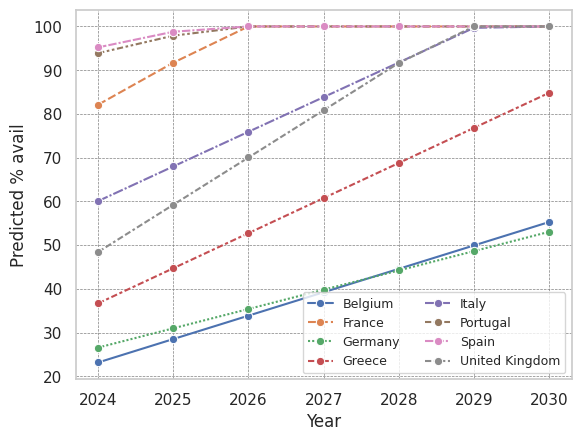

In [ ]:
#####################################################################################
###################################################################################
##using data above, calculate predicted avail values for each constituency until 2030
##
#group by country, then show each countries predicted avail up ti  2030
#df_grouped = df_final.groupby('country', 'FTTP2019'.mean)
df_grouped = df_final[['Country', '2023%','2022%','2021%','2020%','2019%']]
#display(df_grouped.head(100))
vals2024= []
vals2025=[]
vals2026=[]
vals2027= []
vals2028=[]
vals2029=[]
vals2030=[]
vals100=[]
for _,row in df_grouped.iterrows():
    thisval2024 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 5)
    vals2024.append(thisval2024)
    thisval2025 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 6)
    vals2025.append(thisval2025)
    thisval2026 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 7)
    vals2026.append(thisval2026)
    thisval2027 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 8)
    vals2027.append(thisval2027)
    thisval2028 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 9)
    vals2028.append(thisval2028)
    thisval2029 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 10)
    vals2029.append(thisval2029)
    thisval2030 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 11)
    vals2030.append(thisval2030)
    #thisval100 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 0)
    #vals100.append(thisval100)
df_grouped['FTTP2024'] = vals2024
df_grouped['FTTP2025'] = vals2025
df_grouped['FTTP2026'] = vals2026
df_grouped['FTTP2027'] = vals2027
df_grouped['FTTP2028'] = vals2028
df_grouped['FTTP2029'] = vals2029
df_grouped['FTTP2030'] = vals2030

#df_grouped['100% Year'] = vals100
#df_grouped.head()
#drop anything before 2024
df_grouped.drop(['2019%'], axis=1, inplace=True)
df_grouped.drop(['2020%'], axis=1, inplace=True)
df_grouped.drop(['2021%'], axis=1, inplace=True)
df_grouped.drop(['2022%'], axis=1, inplace=True)
df_grouped.drop(['2023%'], axis=1, inplace=True)

percent_cols = ['FTTP2024','FTTP2025',
       'FTTP2026',
       'FTTP2027',
       'FTTP2028','FTTP2029', 'FTTP2030']
meltedData=df_grouped.melt(id_vars=["Country"],value_vars=percent_cols)

meltedData['value'] = np.where(meltedData['value'] > 100, 100, meltedData['value'])
#filter to only return data for United Kingdom, France, Germany, Spain, Italy, Portugal, Belgium and Greece

meltedData = meltedData.query('Country == "United Kingdom" | Country == "France" | Country == "Germany" | Country == "Spain" | Country == "Italy" | Country == "Portugal" | Country == "Greece"| Country == "Belgium"')
display(meltedData.head(100))
#meltedData.plot(x='variable',y='value')
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
ax = sns.lineplot(x='variable', y='value', hue='Country', style='Country',marker = 'o', color='b',# deep, muted, bright, pastel, dark, colorblind
             data=meltedData, )
ax.legend(ncol=2, loc="lower right", frameon=True,prop = {'size' : 9})
ax.set_xticklabels(['2024','2025','2026','2027','2028','2029','2030'])
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel('Year')
plt.ylabel('Predicted % avail')

## using data above, create map as of 2030

Reading Europe geojson data.....


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,NAME,FTTP2030,geometry,centroid
0,Azerbaijan,NaN,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",POINT (47.53098 40.29277)
1,Albania,NaN,"POLYGON ((19.43621 41.02106, 19.45055 41.06, 1...",POINT (20.06984 41.13537)
2,Armenia,NaN,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",POINT (44.95531 40.28484)
3,Bosnia and Herzegovina,NaN,"POLYGON ((17.64984 42.88908, 17.57853 42.94382...",POINT (17.79188 44.16625)
4,Bulgaria,100.00,"POLYGON ((27.87917 42.8411, 27.895 42.8025, 27...",POINT (25.22313 42.76577)
5,Cyprus,100.00,"POLYGON ((33.65262 35.3541, 33.71305 35.38194,...",POINT (33.21686 35.04391)
6,Denmark,100.00,"MULTIPOLYGON (((11.51389 54.82972, 11.56444 54...",POINT (10.06561 55.95578)
7,Ireland,100.00,"MULTIPOLYGON (((-9.65639 53.22222, -9.66333 53...",POINT (-8.15718 53.16418)
8,Estonia,100.00,"MULTIPOLYGON (((23.99083 58.1, 23.97805 58.097...",POINT (25.5269 58.67485)
9,Austria,84.10,"POLYGON ((13.83361 48.7736, 13.85806 48.77055,...",POINT (14.12351 47.60067)


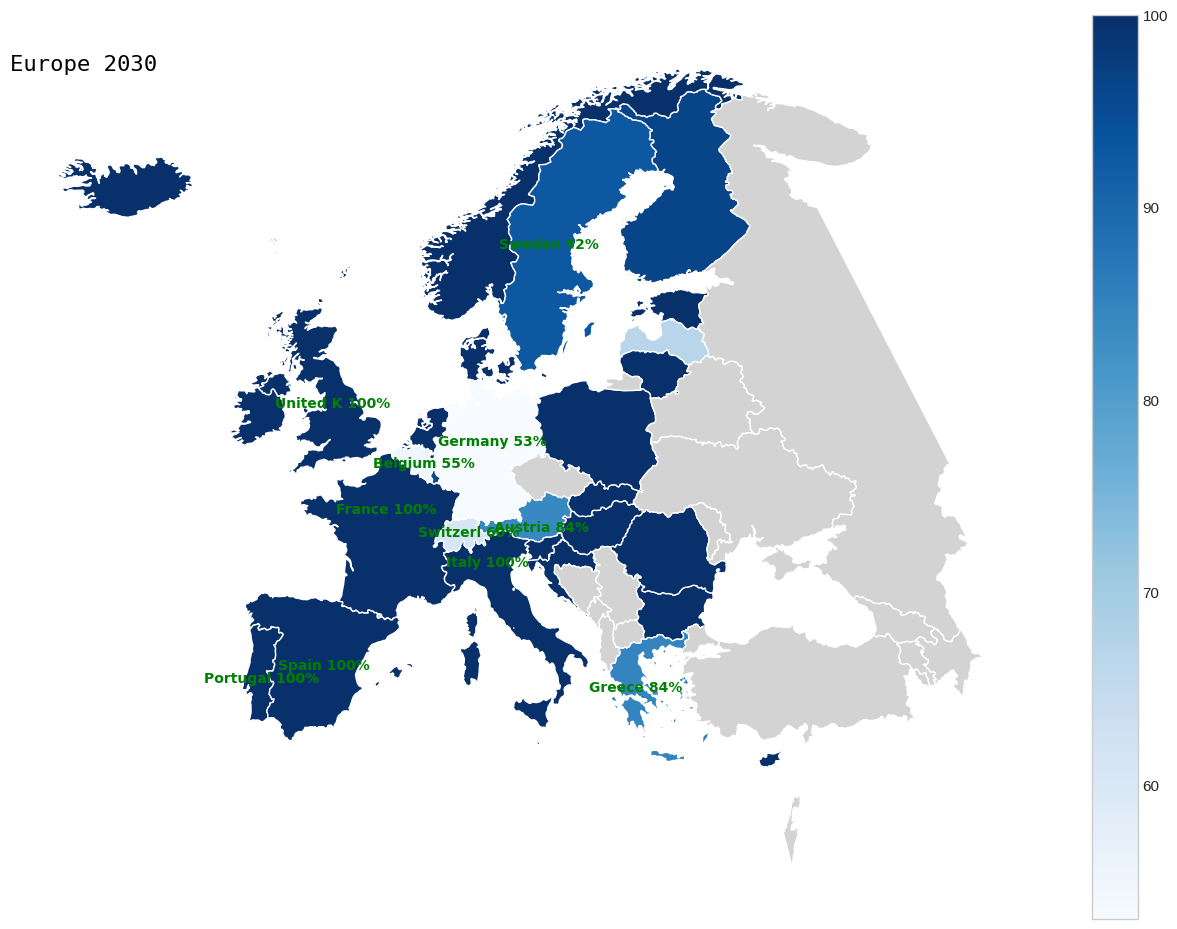

In [93]:
##################################################
##Code to predict data for europe til 2030 and
##load result for 2030 as a map
#############################################

import geopandas as gpd
#need a new function to filter by Unit

def fn_filter_by_unit(thisdf, thisUnit):
  #return a new dataset which only contains specified unit
  return thisdf.query('Unit_x == "' + thisUnit + '"')


#now combine with geojson file to display as a map
#load the geojson file first
fileEuropegeojson = '/content/drive/MyDrive/Colab/europe.geojson'

#############
# Check we can find the file required, and read it into a pandas dataframe
# show the shape of the dataframe
#############
if os.path.exists(fileEuropegeojson) :
    print("Reading Europe geojson data.....")
    europe = gpd.read_file(fileEuropegeojson)
else:
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), fileEuropegeojson)



#add in FTTP values

europe_cleaned = europe[['NAME', 'geometry']]
df_europe_with_percent_geo_total = europe_cleaned.merge(df_final, left_on='NAME', right_on='Country', how='left')
df_europe_with_percent_geo_total['2023%'] = df_europe_with_percent_geo_total['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_total['2022%'] = df_europe_with_percent_geo_total['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_total['2021%'] = df_europe_with_percent_geo_total['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_total['2020%'] = df_europe_with_percent_geo_total['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_total['2019%'] = df_europe_with_percent_geo_total['2019%'].replace(np.nan, 0)


plotdf = df_europe_with_percent_geo_total[['NAME', 'FTTP2030' ,'geometry']]
plotdf['FTTP2030'] = np.where(plotdf['FTTP2030'] > 100, 100, plotdf['FTTP2030'])

def fn_plot_graph(thisdf, thisyear):

  fig, ax = plt.subplots(1, 1)
  missing_kwds = dict(color='lightgrey', label='No Data')
  thisdf.plot(column=thisyear, cmap='Blues', ax=ax, legend='full',missing_kwds=missing_kwds)

  # compute centroids for annotations
  data_projected = plotdf.to_crs(epsg=3035)
  data_projected['centroid'] = data_projected.geometry.centroid
  plotdf['centroid'] = data_projected['centroid'].to_crs(plotdf.crs)
  countries_to_annotate = ['France', 'Italy', 'Portugal',
                           'Greece', 'Belgium', 'Austria',
                           'United Kingdom', 'Spain', 'Germany', 'Switzerland', 'Sweden']

  adjustments = {
    'France': (-1, 1),
     'Italy': (-2.4, 2),
     'Portugal': (-0.5, -1),
     'Greece': (-1.2, -0.8),
     'Belgium': (0, -0.7),
     'Austria': (0, -1),
     'United Kingdom': (0, -1),
     'Spain': (0, -1),
     'Germany': (-0.2, 0),
    'Switzerland' : (0,-0.5),
    'Sweden' : (-1.5, -1)
  }
  # annotate countries

  for country in countries_to_annotate:

      # get centroid
    centroid = plotdf.loc[plotdf['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = plotdf.loc[plotdf['NAME'] == country, 'FTTP2030'].values[0]
    rate = int(rate)
    ax.annotate(f'{country[:8]} {rate}%', (x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=10, fontweight='bold', fontfamily='DejaVu Sans', color='green')

  # display the plot
  plt.tight_layout()

  fig.set_size_inches(14,10)
  plt.style.use('seaborn-v0_8-whitegrid')
  font = {'family':'monospace','color':'black','size':16}
  ax.set_title('Europe 2030', fontdict = font,pad=-30, loc='left')
  plt.axis('off')
  plt.axis('off')
  plt.show()


fn_plot_graph(plotdf, 'FTTP2030')












